<a href="https://colab.research.google.com/github/salonigupta1/DeepLearningProjects/blob/main/TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [25]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
 

In [26]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [27]:
print(X), print(Y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [28]:
X.shape

(6, 3)

In [29]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [30]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 33479.7227
Epoch 2/300
1/1 [==============================] - 0s 29ms/step - loss: 33202.4805
Epoch 3/300
1/1 [==============================] - 0s 30ms/step - loss: 32948.5742
Epoch 4/300
1/1 [==============================] - 0s 37ms/step - loss: 32708.7129
Epoch 5/300
1/1 [==============================] - 0s 37ms/step - loss: 32476.7812
Epoch 6/300
1/1 [==============================] - 0s 26ms/step - loss: 32255.1465
Epoch 7/300
1/1 [==============================] - 0s 25ms/step - loss: 32039.7969
Epoch 8/300
1/1 [==============================] - 0s 29ms/step - loss: 31840.4043
Epoch 9/300
1/1 [==============================] - 0s 28ms/step - loss: 31659.7480
Epoch 10/300
1/1 [==============================] - 0s 30ms/step - loss: 31490.1738
Epoch 11/300
1/1 [==============================] - 0s 26ms/step - loss: 31308.1797
Epoch 12/300
1/1 [==============================] - 0s 43ms/step - loss: 31105.9434
Epo

In [37]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210], dtype='int')
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[225.02632]
1 day input [196.         210.         225.02632141]
1 day output [[236.56114]]
2 day input [210.         225.02632141 236.56114197]
2 day output [[250.95326]]
3 day input [225.02632 236.56114 250.95326]
3 day output [[265.2808]]
4 day input [236.56114 250.95326 265.2808 ]
4 day output [[278.46805]]
5 day input [250.95326 265.2808  278.46805]
5 day output [[293.1268]]
6 day input [265.2808  278.46805 293.1268 ]
6 day output [[307.6077]]
7 day input [278.46805 293.1268  307.6077 ]
7 day output [[321.94687]]
8 day input [293.1268  307.6077  321.94687]
8 day output [[337.0383]]
9 day input [307.6077  321.94687 337.0383 ]
9 day output [[352.1253]]
[225.02632, 236.56114, 250.95326, 265.2808, 278.46805, 293.1268, 307.6077, 321.94687, 337.0383, 352.1253]


In [38]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [39]:
lst_output

[225.02632,
 236.56114,
 250.95326,
 265.2808,
 278.46805,
 293.1268,
 307.6077,
 321.94687,
 337.0383,
 352.1253]

In [41]:
import matplotlib.pyplot as plt

In [43]:
day_new = np.arange(1, 10)
day_pred = np.arange(10, 20)

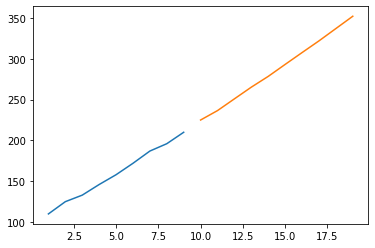

In [44]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)